# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

In [ ]:
# To run this notebook, locally as a jupyter notebook, you need to install the following packages:

#1. Create a virtual environment through conda or venv
#   For example, using conda:
#                conda create -n [myenv] python=3.8
#                conda activate [myenv]
#   Or using venv:
#                python3 -m venv [myenv]
#                source [myenv]/bin/activate
#
#
#2. Activate the virtual environment
#3. Install the required packages using pip
#4. Run the notebook


# Install the required packages
%pip install numpy -q
%pip install matplotlib -q
%pip install tensorflow -q
%pip install scikit-learn -q
%pip install tensorflow-hub -q 
%pip install tensorflow-datasets -q
%pip install kagglehub -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



import numpy as np
import matplotlib.pyplot as plt
import os

2025-05-15 16:15:28.987262: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 16:15:29.120076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 16:15:29.223816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747343729.316924   13183 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747343729.341260   13183 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-15 16:15:29.547055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [15]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create the model
def create_model(
    hidden_layer1 :int = 128,
    hidden_layer2 :int = 128,
    hidden_layer3 :int = 128,
    learning_rate :float = 0.001
    ):

    """
    Create a simple feedforward neural network model using Keras.
    Args:
        hidden_layer1 (int): Number of neurons in the first hidden layer.
        hidden_layer2 (int): Number of neurons in the second hidden layer.
        hidden_layer3 (int): Number of neurons in the third hidden layer.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model (keras.Model): Compiled Keras model.
    """

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_layer1, activation='relu'),
        keras.layers.Dense(hidden_layer2, activation='relu'),
        keras.layers.Dense(hidden_layer3, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



# Train the model
model = create_model()
model.summary()
model.fit(train_images, train_labels, epochs=5)


# Evaluate functional performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)




/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-15 16:15:36.820304: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6926 - loss: 3.7321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8086 - loss: 0.5626
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8289 - loss: 0.4885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8471 - loss: 0.4282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8536 - loss: 0.4068
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8367 - loss: 0.4584

Test accuracy: 0.8381999731063843


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


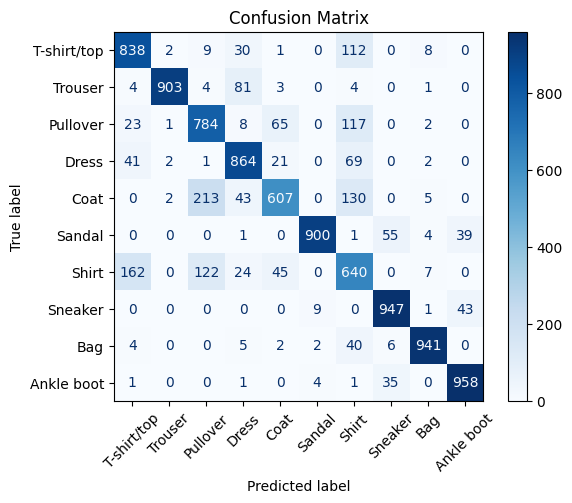

In [19]:
# confusion matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
                            )

disp.plot(cmap= 'Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Save the model to a file
def save_model(model, model_name: str = 'fashion_mnist_model'):
    """
    Save the Keras model to a folder to be deployed in TFLite and the weights in .h5 format to re use in python.
    Args:
        model (keras.Model): Keras model to be saved.
        model_name (str): Name of the file to save the model.
    """

    model.save(model_name + ".h5")

    model.save(model_name + '.h5')



    print(f"Model saved as {model_name}")


# Save the model
save_model(model)


Model saved as fashion_mnist_model


In [6]:
# Instantiate model
models = {}
models_performance = {}

arquitecture = [
    (128, 256, 64, 0.001),
    (64, 128, 256, 0.001),
    (256, 64, 128, 0.001),
    (128, 64, 32, 0.001),
    (64, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (256, 256, 256, 0.001)

]

for i in range(1, len(arquitecture)+1):

    models[f'modelo_{i}'] = create_model(
        hidden_layer1=arquitecture[i-1][0],
        hidden_layer2=arquitecture[i-1][1],
        hidden_layer3=arquitecture[i-1][2],
        learning_rate=arquitecture[i-1][3]
        )

    models[f'modelo_{i}'].summary()
    models[f'modelo_{i}'].fit(train_images, train_labels, epochs=5)
    test_loss, test_acc = models[f'modelo_{i}'].evaluate(test_images, test_labels)
    models_performance[f'modelo_{i}'] = (test_loss, test_acc)




c:\Users\julia\Desktop\Universidad\Julian\Embedded-Machine-Learning\Lab2\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,602 (588.29 KB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6939 - loss: 3.7439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8191 - loss: 0.5233
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.4445
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8477 - loss: 0.4299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8566 - loss: 0.4009
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8179 - loss: 0.4962


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6699 - loss: 2.4758
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7972 - loss: 0.6001
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8299 - loss: 0.4846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8399 - loss: 0.4437
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8477 - loss: 0.4269
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.4219


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,018 (886.79 KB)

 Trainable params: 227,018 (886.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6921 - loss: 3.2851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8036 - loss: 0.5801
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8229 - loss: 0.5134
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8386 - loss: 0.4563
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8483 - loss: 0.4299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.4469


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4964 - loss: 3.3467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6223 - loss: 0.9480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7214 - loss: 0.6640
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7987 - loss: 0.5220
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8285 - loss: 0.4736
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8432 - loss: 0.4503


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6319 - loss: 2.8276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7936 - loss: 0.5870
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8339 - loss: 0.4739
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8416 - loss: 0.4383
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8534 - loss: 0.4088
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.4100


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5693 - loss: 2.5414
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7118 - loss: 0.7274
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7335 - loss: 0.6392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7428 - loss: 0.5988
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7485 - loss: 0.5841
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7405 - loss: 0.6141


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5493 - loss: 2.9709
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7033 - loss: 0.7506
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7264 - loss: 0.6716
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7313 - loss: 0.6534
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7456 - loss: 0.6008
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7397 - loss: 0.5954


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7163 - loss: 3.5881
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8241 - loss: 0.4933
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8433 - loss: 0.4430
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8534 - loss: 0.4055
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8654 - loss: 0.3816
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.4023


modelo_1: test_loss: 0.49860531091690063, test_acc: 0.8162000179290771
modelo_2: test_loss: 0.4294179081916809, test_acc: 0.8428999781608582
modelo_3: test_loss: 0.45872724056243896, test_acc: 0.8442999720573425
modelo_4: test_loss: 0.46359989047050476, test_acc: 0.8389999866485596
modelo_5: test_loss: 0.4252106547355652, test_acc: 0.8468000292778015
modelo_6: test_loss: 0.6285577416419983, test_acc: 0.7396000027656555
modelo_7: test_loss: 0.6001451015472412, test_acc: 0.7419999837875366
modelo_8: test_loss: 0.40543365478515625, test_acc: 0.8522999882698059


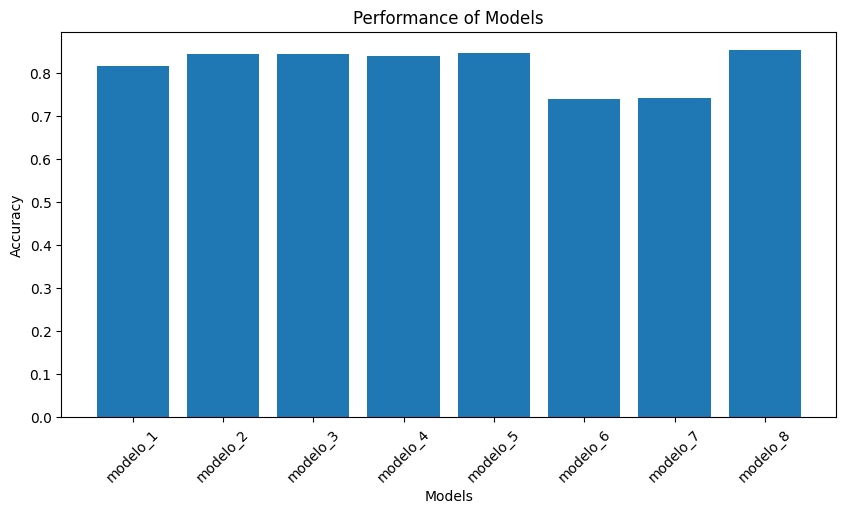

In [7]:
for key, value in models_performance.items():
    print(f"{key}: test_loss: {value[0]}, test_acc: {value[1]}")

# plot the performance of the models
def plot_performance(models_performance):
    """
    Plot the performance of the models.
    Args:
        models_performance (dict): Dictionary containing the performance of the models.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(models_performance.keys(), [value[1] for value in models_performance.values()])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Performance of Models')
    plt.xticks(rotation=45)
    plt.show()

# Plot the performance of the models
plot_performance(models_performance)

In [21]:
# Load the saved model
new_model = create_model()
new_model = tf.keras.models.load_model('fashion_mnist_model.h5')

new_model.summary()


# Verify functional performance
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print("test lost: ", test_loss, "\ntest acc: ", test_acc)

c:\Users\julia\Desktop\Universidad\Julian\Embedded-Machine-Learning\Lab2\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,796 (526.55 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.4584
test lost:  0.4607214331626892 
test acc:  0.8381999731063843


### CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [9]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Create the CNN model
model_conv = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
model_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_conv.summary()

# Train the model
model_conv.fit(train_images, train_labels, epochs=10)

# Evaluate functional performance
test_loss, test_acc = model_conv.evaluate(test_images, test_labels)
print("test_loss: ", test_loss, "\ntest_acc: ", test_acc)

# Save the model to a file
save_model(model_conv, 'fashion_mnist_model_conv')


c:\Users\julia\Desktop\Universidad\Julian\Embedded-Machine-Learning\Lab2\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,290 (1.07 MB)

 Trainable params: 281,290 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7750 - loss: 0.6129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8899 - loss: 0.3015
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9072 - loss: 0.2485
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9215 - loss: 0.2097
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9288 - loss: 0.1856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9384 - loss: 0.1595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9474 - loss: 0.1400
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9545 - loss: 0.1227
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9601 - loss: 0.1077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9643 - loss: 0.0934
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9068 - loss: 0.3217
test_loss:  0.315069884

INFO:tensorflow:Assets written to: fashion_mnist_model_conv\assets


Saved artifact at 'fashion_mnist_model_conv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_60')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2832864923280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2832864935568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2832864924240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2833001416656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2833001418192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2833001417424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2833001416080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2833001420304: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as fashion_mnist_model_conv


In [10]:
def calculate_operations(layer):
    try:
        input_shape = layer.input.shape
        output_shape = layer.output.shape

        if isinstance(layer, tf.keras.layers.Conv2D):

            _, _, _, in_c = input_shape
            _, out_h, out_w, out_c = output_shape
            k_h, k_w = layer.kernel_size

            return int(out_h * out_w * k_h * k_w * in_c * out_c)

        elif isinstance(layer, tf.keras.layers.Dense):
            return int(input_shape[-1] * output_shape[-1])

        else:
            return 0

    except Exception as e:
        print(f"Error en capa {layer.name}: {e}")
        return 0

# Example usage:
total_operations_CNN = sum(calculate_operations(layer) for layer in model_conv.layers)
print(f"Total operations in CNN model: {total_operations_CNN}")
     
total_operations_FFNN = sum(calculate_operations(layer) for layer in model.layers)
print(f"Total operations in FFNN model: {total_operations_FFNN}")



Total operations in CNN model: 9905920
Total operations in FFNN model: 134400


In [11]:
def model_size(archivo1, archivo2):
    """
    Calculate the size of the model files in bytes.
    Args:
        archivo1 (str): Path to the first model file.
        archivo2 (str): Path to the second model file.

    Returns:
        size1 (int): Size of the first model file in bytes.
        size2 (int): Size of the second model file in bytes.
    """
    size1 = os.path.getsize(archivo1)
    size2 = os.path.getsize(archivo2)

    return size1, size2


# Example usage:
first_model_file = "fashion_mnist_model_conv.weights.h5"
second_model_file = 'fashion_mnist_model.weights.h5'
size1, size2 = model_size(first_model_file, second_model_file)
print(f"Size of {first_model_file} file: {size1} bytes")
print(f"Size of {second_model_file} file: {size2} bytes")

Size of fashion_mnist_model_conv.weights.h5 file: 3408200 bytes
Size of fashion_mnist_model.weights.h5 file: 1646784 bytes


### Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import kagglehub
from tensorflow import keras

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")

print("Path to model files:", path)



c:\Users\julia\Desktop\Universidad\Julian\Embedded-Machine-Learning\Lab2\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 2.09MB/s]







100%|██████████| 8.65M/8.65M [00:01<00:00, 6.14MB/s]

Path to model files: C:\Users\julia\.cache\kagglehub\models\google\mobilenet-v2\tensorFlow2\tf2-preview-feature-vector\4


In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow import keras
import time

def format_image(image, label):
    # Verificación del tamaño de la imagen puesto que el dataset contiene 2 que corresponden al ancho y alto de la imagen
    if len(image.shape) == 2:
        # Agrega una tercera dimensión referente al canal (color), el cual por defecto es 1 (escala de grises).
        image = tf.expand_dims(image, axis=-1)
        '''El mobilenet_v2 corresponde a un modelo con tres canales por lo que se pasa de escala de grises a RGB
       para mantener la compatibilidad'''
        image = tf.image.grayscale_to_rgb(image)

    # Redimensiona la imagen a (224, 224) para que coincida con el modelo ya entrenado de mobilenet_v2, ya que Fashion MNIST es de 28*28
    image = tf.image.resize(image, (224, 224)) # dim (ancho, alto, #número de canales)

    # Normaliza la imagen dividiendo por 255.0
    image = image / 255.0

    return image, label

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Take a part of the complete dataset
train_images = train_images[:500,:,:]
train_labels = train_labels[:500]
test_images = test_images[:100,:,:]
test_labels = test_labels[:100]


num_examples = len(train_images)
num_classes = len(class_names)

# Convert to tensor datatype
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# split the data in training, validation, and test datasets
BATCH_SIZE = 32
train_batches = train_data.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = train_data.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_data.map(format_image).batch(1)

# download the pre-trained model and create a Keras meta-layer

module_selection = ("mobilenet_v2", 224, 1280)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,),
                                   output_shape=[FV_SIZE],
                                   trainable=False)

# This shit to get work 
feature_extractor =  tf.keras.layers.Lambda(feature_extractor)

model = tf.keras.Sequential([
    feature_extractor, 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(train_batches,
          epochs=5,
          validation_data=validation_batches)


Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 788ms/step - accuracy: 0.2739 - loss: 1.9876 - val_accuracy: 0.7840 - val_loss: 0.8134
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 673ms/step - accuracy: 0.8050 - loss: 0.6675 - val_accuracy: 0.8620 - val_loss: 0.4707
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 742ms/step - accuracy: 0.8533 - loss: 0.4524 - val_accuracy: 0.9220 - val_loss: 0.3195
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 712ms/step - accuracy: 0.9226 - loss: 0.2999 - val_accuracy: 0.9500 - val_loss: 0.2390
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 735ms/step - accuracy: 0.9289 - loss: 0.2532 - val_accuracy: 0.9640 - val_loss: 0.1838


In [13]:
test_loss, test_acc = model.evaluate(test_batches)
print("test lost: ", test_loss, "\ntest acc: ", test_acc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.8418 - loss: 0.5559
test lost:  0.5775370597839355 
test acc:  0.800000011920929


In [14]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │        64,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,682 (756.57 KB)

 Trainable params: 64,560 (252.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 129,122 (504.39 KB)

## Conclusions:

